# ETL and EDA Implementation

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
file_path = '/Users/vaidehi/Desktop/spotify_dataset.csv'
df= pd.read_csv(file_path)
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


### Initial Data Exploration

In [4]:
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData Types:\n",df.dtypes)
print("\nMissing values:\n", df.isnull().sum())



Dataset shape: (20594, 24)

Column names: ['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream', 'EnergyLiveness', 'most_playedon']

Data Types:
 Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_min        float64
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Licensed             object
official_video       object
Stream              float64
EnergyLiveness      flo

### Data Cleaning

In [5]:
# Dropping the title column as it is a duplicate of track. It has the same information.

c_drop=['Title']
df_cleaned=df.drop(columns=c_drop)


# Dropping rows that has missing values of EnergyLiveness

df=df.dropna(subset=['EnergyLiveness'])

# Standardizing the text

text_columns=['Artist','Track','Album','Album_type','Channel','Licensed','official_video','most_playedon']
for c in text_columns:
    df.loc[:,c]=df[c].str.lower().str.strip()



### Feature Engineering

In [6]:
# Creating 3 new features

# Measures user interaction relative to views

df['engagement_rate']=(df['Likes']+df['Comments'])/df['Views']

# Combines valence and energy to represent songs mood.

df['mood_score']=df['Valence']*df['Energy']

# Integrates danceability and tempo to assess dance potential

df['danceability_score']=df['Danceability']*df['Tempo']


### Top 10 Most Viewed tracks

In [15]:
top_views=df[['Track','Views']].sort_values(by='Views',ascending=False).head(10)
print(top_views)

                                    Track         Views
1147                            despacito  8.079649e+09
365                             despacito  8.079647e+09
12385                        shape of you  5.908398e+09
14501  see you again (feat. charlie puth)  5.773798e+09
12402  see you again (feat. charlie puth)  5.773797e+09
20180                   wheels on the bus  4.898831e+09
10636      uptown funk (feat. bruno mars)  4.821016e+09
8888                gangnam style (?????)  4.679767e+09
9519                                sugar  3.817733e+09
12965                                roar  3.725749e+09


We can see same track appear multiple times in the list. It can be due to different uploads or versions as it is a multi-source dataset.

In [16]:
# Aggregated version

top_unique_views=df.groupby('Track')['Views'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_unique_views)

                                            Track         Views
0                                       despacito  1.615930e+10
1              see you again (feat. charlie puth)  1.154760e+10
2                                         lean on  9.974505e+09
3                                    shape of you  5.908398e+09
4                                   calma - remix  5.322011e+09
5                       this is what you came for  5.252060e+09
6      swalla (feat. nicki minaj & ty dolla $ign)  5.162404e+09
7                               wheels on the bus  4.901680e+09
8  taki taki (with selena gomez, ozuna & cardi b)  4.828403e+09
9                  uptown funk (feat. bruno mars)  4.821016e+09


The track view counts were aggregated by name to get a holistic view of each songs total reach, accounting for variations in uploads.

### Top 10 Most Liked tracks

In [17]:
top_likes=df[['Track','Likes']].sort_values(by='Likes',ascending=False).head(10)
print(top_likes)

                                    Track       Likes
1147                            despacito  50788652.0
365                             despacito  50788626.0
14501  see you again (feat. charlie puth)  40147674.0
12402  see you again (feat. charlie puth)  40147618.0
14482                            dynamite  35892575.0
12385                        shape of you  31047780.0
15941         boy with luv (feat. halsey)  27588224.0
14486         boy with luv (feat. halsey)  27588189.0
16579                               faded  26446178.0
8888                gangnam style (?????)  26399133.0


### Correlation Heatmap

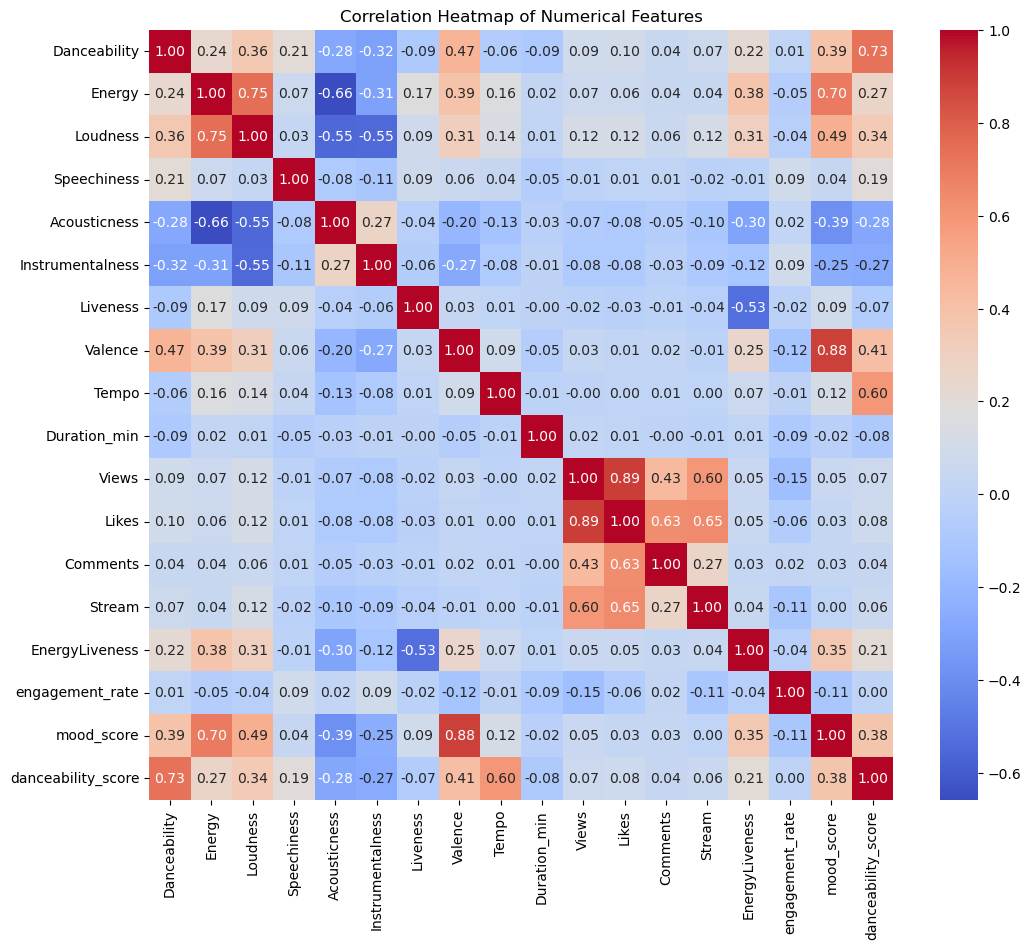

In [18]:
# Computing matrix

corr_matrix=df.select_dtypes(include='number').corr()

# Plot heatmap

plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm' )

plt.title('Correlation Heatmap of Numerical Features')

plt.show()

The map shows some strong and expected relationships. For example, songs with more views tend to have more likes, and louder songs usually have higher energy. Tracks with high danceability also score high in the engineered danceability feature. Interestingly, the engagement rate does not really follow the same pattern as views or likes, which means that a song can have high interaction even if it is not super popular. We also see that acoustic and instrumental songs tend to be less loud and energetic, which makes sense as they often belong to calmer music.

### Distribution of Track Durations

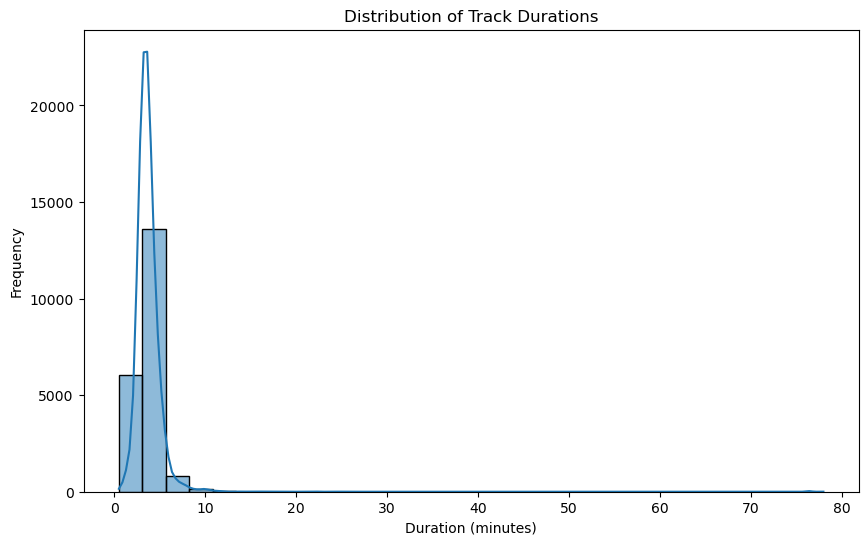

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Duration_min'], bins=30, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

The distribution of track durations is right-skewed, with most songs falling within the typical 2 to 5 minute range. Only a few tracks extend beyond 10 minutes, making them outliers. This pattern aligns with standard formats used in streaming platforms.

### Energy vs. Danceability Scatter plot

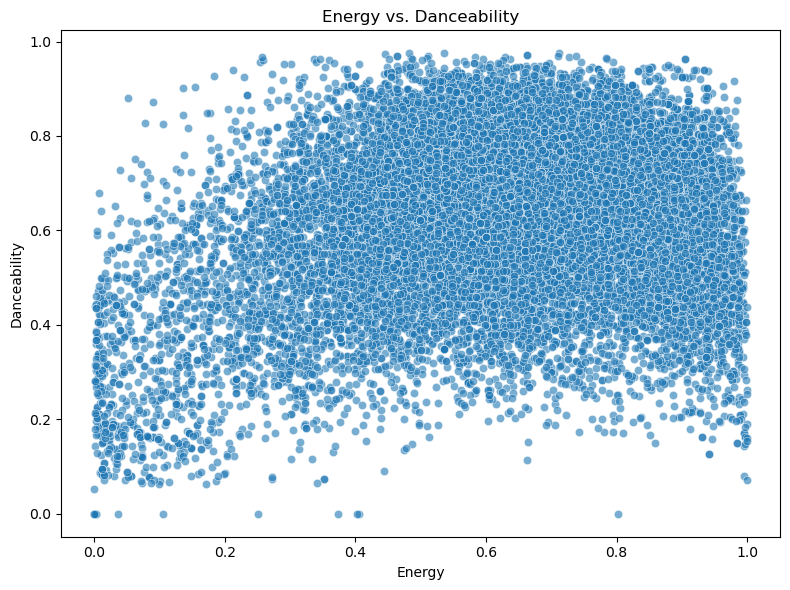

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Energy', y='Danceability', data=df, alpha=0.6)
plt.title('Energy vs. Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.tight_layout()
plt.show()

There appears to be a moderate positive realtionship between Energy and Danceability. Most songs with high danceability also have medium to high energy, while low-energy songs are generally less danceable. This suggests that energetic tracks more likely to encourage dancing.

### Box plot of Engagement rate by Popularity level

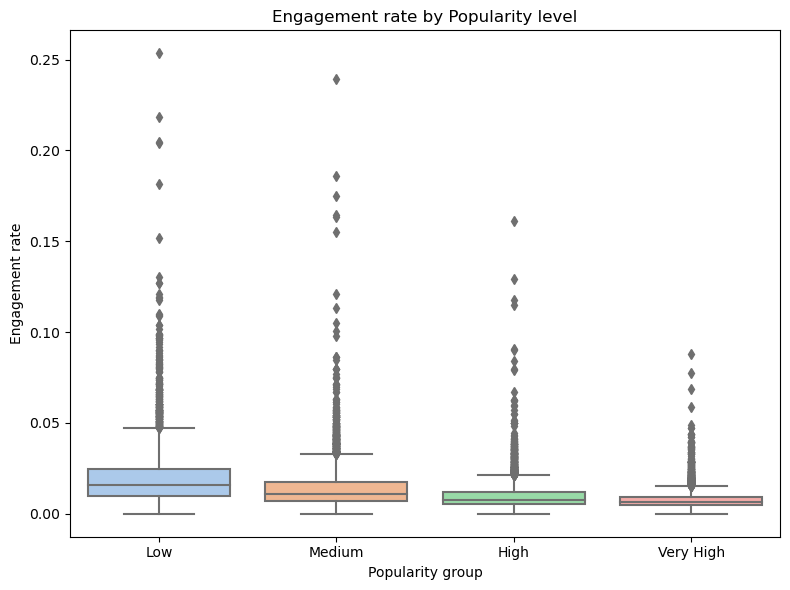

In [22]:
# Creating popularity bin

df['popularity_group']=pd.qcut(df['Views'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Plotting

plt.figure(figsize=(8,6))
sns.boxplot(x='popularity_group', y='engagement_rate', data=df, palette='pastel')
plt.title('Engagement rate by Popularity level')
plt.xlabel('Popularity group')
plt.ylabel('Engagement rate')
plt.tight_layout()
plt.show()


Less poplular songs tend to show higher engagement rates relative to their views, with many extreme high outliers. This suggests that niche or underrated tracks often foster strong listener interaction, while more popular songs may recieve proportionally less engagement.

### Distribution of Mood score

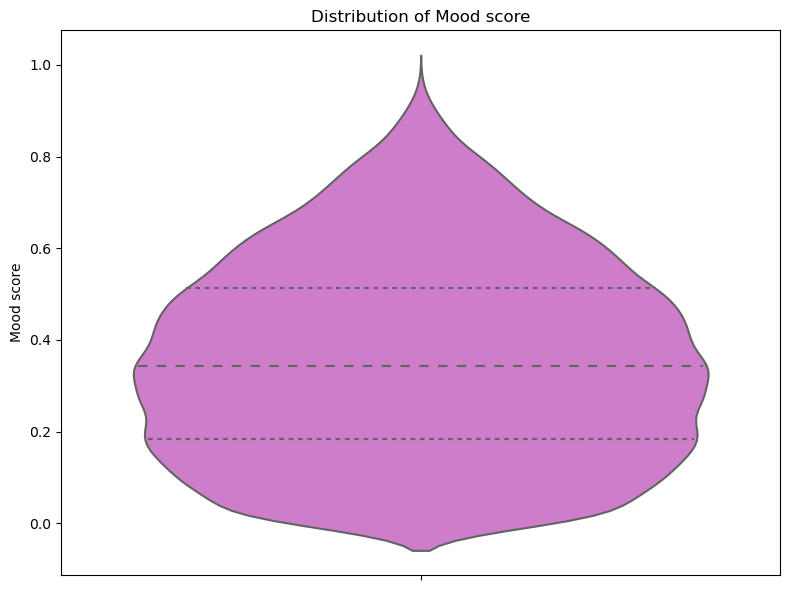

In [23]:
plt.figure(figsize=(8,6))
sns.violinplot(y='mood_score', data=df, inner='quartile', color='orchid')
plt.title('Distribution of Mood score')
plt.ylabel('Mood score')
plt.tight_layout()
plt.show()

This shows most songs have mood scores clustered around 0.3 to 0.6, with highest density centered near 0.35. There are relatively fewer tracks with very low (0) or very high (above 0.8), showing a balanced emotional tone in most tracks.  

### Average Danceability Score by Artist (Top 10)

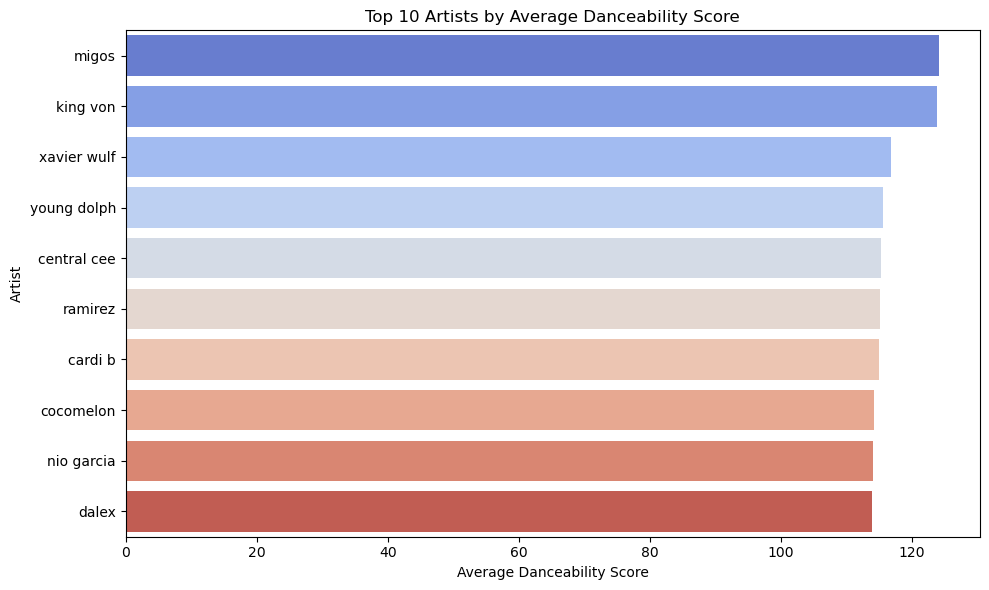

In [7]:
top_artists=df.groupby('Artist')['danceability_score'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='danceability_score', y='Artist', data=top_artists, palette='coolwarm')
plt.title('Top 10 Artists by Average Danceability Score')
plt.xlabel('Average Danceability Score')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


### Correlation of Mood score with others

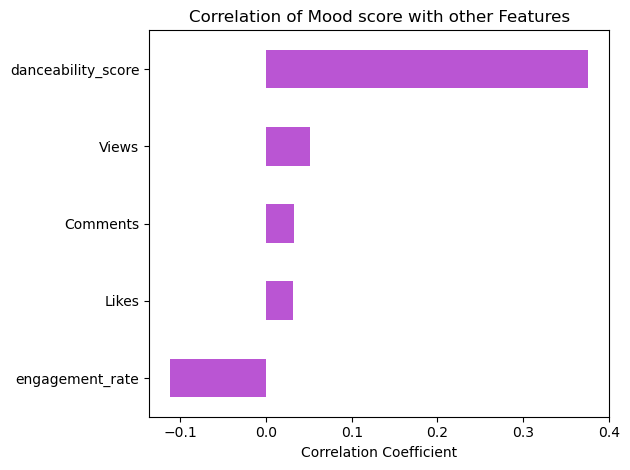

In [9]:
corr_mood=df[['mood_score','engagement_rate','danceability_score','Views','Likes','Comments']].corr()
corr_mood['mood_score'].drop('mood_score').sort_values().plot(kind='barh', color='mediumorchid')

plt.title('Correlation of Mood score with other Features')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

The mood score shows positive correlation with danceability, indicating that energetic songs tend to be more dance friendly. However, mood does not strongly impact popularity metrics like likes, views, or comments, suggesting that emotional tone alone may not drive a songs success ot listener interaction. 

### Word Cloud of Track Titles

In [10]:
!pip install wordcloud

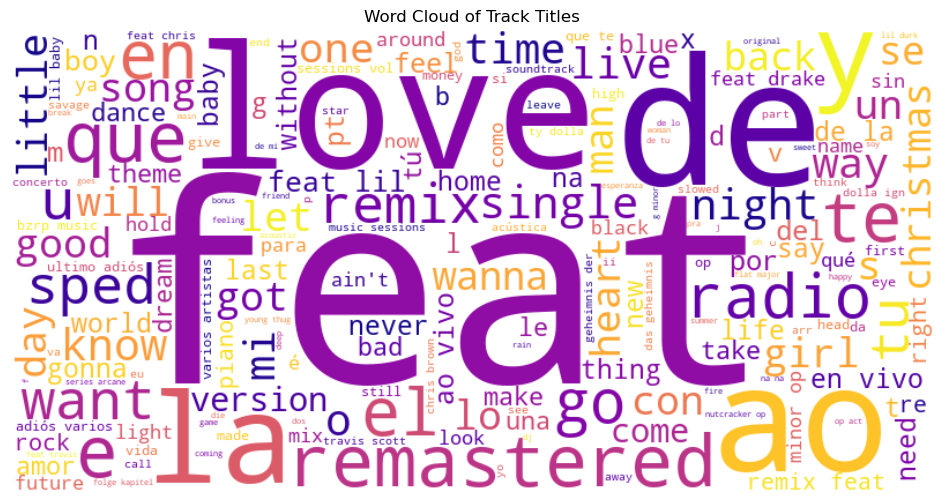

In [11]:
from wordcloud import WordCloud

# Combine all track names to one big sting

text=''.join(df['Track'].astype(str))

#Genrate wordcloud

wordcloud=WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Titles')
plt.show()


High Frequent terms like "feat", "remix" suggest that dataset contains large number of collaborations and re-released tracks. Words like "love", "girl" point to common emotional elements in music. The presence of non-English words such as "la", "de" indicates dataset includes wide range of international tracks.

### Real World cases where above analyzations can be used

Top viewed and liked tracks help streaming platforms and marketers identify trending content. Track duration analysis can guide music producers to align with industry norms for better listener retention. Correlation heatmaps assist data scientists in selecting predictive features for recommendation systems. Engagement rate analysis can uncover niche tracks with loyal listeners, useful for targeted marketing. Mood, danceability, and word cloud visualizations support playlist curation, therapeutic music apps, and naming trend analysis.